# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

Great job on finding and filtering your data! Here are some ideas on what you could do next to create a compelling data analysis project:

Analyze demographic and economic characteristics of the counties with a high percentage of Black residents, such as income levels, poverty rates, education levels, and employment rates. You could also compare these characteristics to counties with a lower percentage of Black residents.

Explore the relationship between the percentage of Black residents and various health outcomes, such as obesity rates, diabetes rates, and mortality rates. You could also investigate potential reasons for any observed disparities.

Examine the political landscape of the Black Belt, including voter turnout rates, election outcomes, and the impact of gerrymandering on the representation of Black voters.

Investigate the history of the Black Belt and its significance in the Civil Rights Movement. You could analyze the locations of important historical events, such as the Montgomery Bus Boycott or the Selma to Montgomery marches, and their impact on the region.

Use machine learning or statistical analysis to predict trends in the data, such as future population growth or changes in economic indicators.

Remember to document your code and present your results in a clear and visually appealing manner. Good luck with your project!

In [187]:
pip install geopandas



Note: you may need to restart the kernel to use updated packages.


In [168]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import geopandas as gpd
import plotly.graph_objects as go
import seaborn as sns

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Þetta er það sem ég spurði chat open AI:I am making an assingment in a programming class and the assignment is as follows: (verkefnalýsingin)
I have county data for the U.S. and I want to find the Black belt in the southern united states. I have already filtered some data by finding counties in these states that have a fraction 40% or higher black. My question is: is that considered data cleaning and what could I do going forward?

Þetta er svarið sem ég fékk:
Filtering data to extract relevant information based on a specific criterion (in your case, counties with a fraction of 40% or higher Black population) can be considered as a part of data cleaning. However, data cleaning typically involves a broader range of tasks, including identifying and dealing with missing values, removing duplicates, correcting data formatting and inconsistencies, and transforming data into a more suitable format for analysis.

Moving forward, you could consider the following steps to further analyze the data and present your findings:

1. Exploratory data analysis: This involves visualizing and summarizing the data to gain insights and identify patterns or trends. For example, you could create histograms or box plots to compare the distribution of Black population across counties or states.

2. Statistical analysis: You could use statistical methods to test hypotheses or quantify relationships between variables. For example, you could use regression analysis to investigate the relationship between Black population fraction and socioeconomic indicators such as poverty rates or education levels.

3. Data visualization: Creating interactive visualizations that allow users to explore the data can be an effective way to communicate your findings. For example, you could create an interactive map of the southern United States that highlights the counties with the highest Black population fraction.

4. Interpretation and presentation of results: After analyzing the data, you could summarize your findings in a report that tells a story about the economic phenomenon or trend you have identified. You could also present your results in figures and tables that make it easy for others to understand your findings.

Remember to structure your code project and document your code throughout the project. You could also consider getting feedback from your peers to improve your project before handing it in.

# Read and clean data

Import your data, either through an API or manually, and load it. 

In [170]:
dr = pd.read_csv('Neighborhood Characteristics by Coounty.csv', delimiter = ';')
dr

state  county       cz      czname  hhinc_mean2000  \
0         1       1  11101.0  Montgomery       74699.969   
1         1       3  11001.0      Mobile       76064.086   
2         1       5  10301.0     Eufaula       51246.004   
3         1       7  10801.0  Tuscaloosa       55094.492   
4         1       9  10700.0  Birmingham       62749.727   
...     ...     ...      ...         ...             ...   
3216     72     147      NaN         NaN             NaN   
3217     72     149      NaN         NaN             NaN   
3218     72     151      NaN         NaN             NaN   
3219     72     153      NaN         NaN             NaN   
3220      2     158      NaN         NaN             NaN   

      mean_commutetime2000  frac_coll_plus2000  frac_coll_plus2010  \
0                28.490602            0.189735            0.221990   
1                26.501080            0.230036            0.260710   
2                24.047514            0.107450            0.133496   
3                32.875317            0.070026            0.099241   
4                36.189240            0.096214            0.126334   
...                    ...                 ...                 ...   
3216                   NaN                 NaN            0.133833   
3217                   NaN                 NaN            0.159545   
3218                   NaN                 NaN            0.133511   
3219                   NaN                 NaN            0.169470   
3220                   NaN                 NaN                 NaN   

      foreign_share2010  med_hhinc1990  ...  singleparent_share1990  \
0              0.020155   29718.635194  ...                0.165540   
1              0.037592   26435.690624  ...                0.184214   
2              0.028144   19026.749741  ...                0.271470   
3              0.006859   19696.785014  ...                0.188628   
4              0.047343   23159.691502  ...                0.122455   
...                 ...            ...  ...                     ...   
3216                NaN            NaN  ...                     NaN   
3217                NaN            NaN  ...                     NaN   
3218                NaN            NaN  ...                     NaN   
3219                NaN            NaN  ...                     NaN   
3220                NaN            NaN  ...                     NaN   

      singleparent_share2000  traveltime15_2010   emp2000  \
0                   0.240811           0.204163  0.609586   
1                   0.237883           0.275326  0.577026   
2                   0.393263           0.376049  0.453271   
3                   0.257294           0.252683  0.494241   
4                   0.173408           0.194344  0.577810   
...                      ...                ...       ...   
3216                     NaN           0.542981       NaN   
3217                     NaN           0.275975       NaN   
3218                     NaN           0.164859       NaN   
3219                     NaN           0.345688       NaN   
3220                     NaN                NaN       NaN   

      mail_return_rate2010  ln_wage_growth_hs_grad  popdensity2010  \
0                82.333183               -0.063314       91.802681   
1                80.034088                0.030093      114.647510   
2                74.899071                0.189366       31.029207   
3                70.003571               -0.020073       36.806339   
4                83.100349                0.096463       88.902191   
...                    ...                     ...             ...   
3216             56.821289                     NaN      183.205960   
3217             71.382767                0.079878      731.627260   
3218             67.037354                0.174301      687.150210   
3219             74.007416                0.300884      616.529540   
3220                   NaN                     NaN             NaN   

      popdensity2

In [171]:
# Load county data
county_data_file = 'Neighborhood Characteristics by Coounty.csv'
county_data = pd.read_csv(county_data_file, delimiter = ';')

# Convert the "county" column to an integer
county_data["county"] = county_data["county"].astype(int)
county_data["state"] = county_data["state"].astype(int)

# Load GeoJSON file
geojson_file = 'cb_2018_us_county_500k.zip'
geojson = gpd.read_file(geojson_file)

# Convert the "COUNTYFP" column to an integer
geojson["COUNTYFP"] = geojson["COUNTYFP"].astype(int)
geojson["STATEFP"] = geojson["STATEFP"].astype(int)

# Inner join county data with GeoJSON file
merged_data = geojson.merge(county_data, how='inner', left_on=['STATEFP', 'COUNTYFP'], right_on=['state', 'county'])

# Filter the data
state_list = [1, 5, 12, 13, 22, 28, 37, 45, 47, 51]
new_df = merged_data[(merged_data.state.isin(state_list)) & (merged_data.share_black2010 >= 0.4)]

# Create choropleth map
fig = px.choropleth(new_df, 
                    geojson=new_df.geometry, 
                    locations=new_df.index, 
                    color='share_black2010',
                    color_continuous_scale="Rainbow",
                    scope="usa",
                    hover_name="NAME",
                    hover_data=['share_black2010'])
fig.update_layout(
    coloraxis_colorbar_title='Fraction Black ≥ 40%'
)
fig.update_layout(
    title={
        'text': "<b>The Black Belt in the American South</b>",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)


# Add a trace with a GeoJSON polygon of the boundary of the black belt region
black_belt_boundary = go.Scattergeo(
    locationmode='USA-states',
    lon=[-94.567051, -93.863926, -92.721348, -90.480137, -89.312582, -86.719809, -84.236898, -82.871161, -81.245184, -79.784946, -78.200684,-75.937757, -75.300293, -78.376465, -81.650391, -82.130013, -87.535286, -89.424934, -93.292122, -94.742317, -94.567051],
    lat=[32.367348, 30.945961, 29.941994, 29.483988, 30.674239, 30.712028, 29.858213, 31.635626, 31.335824, 32.606049, 33.987637, 35.801456, 37.899646, 38.124699, 36.436475, 34.636174, 34.563828, 35.749438, 34.888888, 33.103765, 32.367348],
    mode='lines',
    line=dict(width=2, dash='dot', color='black')
)
fig.add_trace(black_belt_boundary)


fig.show()




In [172]:
print("Number of counties colored:", len(new_df))

Number of counties colored: 179


In [173]:
print("Filtered data length:", len(merged_data[(merged_data.state.isin(state_list)) & (merged_data.share_black2010 >= 0.4)]))


Filtered data length: 179


Investigate the relationship between the fraction of black residents in a county and various measures of intergenerational mobility, such as the rank-rank slope or absolute upward mobility. You could create visualizations such as scatter plots or heatmaps to explore this relationship


I need to merge the file which includes the fraction black data with the county intergenerational mobility file. 

To merge the two document then I need to create a new column with the County FIPS code as before I do that then they are in two columns, the state and county column. 

In [174]:
state_list = [1, 5, 12, 13, 22, 28, 37, 45, 47, 51]
state_df = county_data[county_data.state.isin(state_list)]
filter_county_data =state_df[state_df.share_black2010>=.40]
intergen_data = pd.read_excel('intergenerational mobility county copy.xlsx')

filter_county_data.loc[:, 'County_FIPS_Code'] = '0' + filter_county_data['state'].astype(str).str.zfill(2) + filter_county_data['county'].astype(str).str.zfill(3)

# concatenate state and county columns and convert to integer
filter_county_data['County_FIPS_Code'] = filter_county_data.apply(
    lambda row: int('{:02d}{:03d}'.format(row['state'], row['county'])), axis=1)

filter_county_data.insert(0, 'County_FIPS_Code', filter_county_data.pop('County_FIPS_Code'))
filter_county_data
filter_intergen_data = pd.merge(filter_county_data, intergen_data, on='County_FIPS_Code', how='inner')




/var/folders/fs/cqlf3bqx62z617mdbh3sn8b00000gn/T/ipykernel_68519/1580648503.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/fs/cqlf3bqx62z617mdbh3sn8b00000gn/T/ipykernel_68519/1580648503.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



To create a scatter plot or heatmap with the fraction of black residents on the x-axis and the measure of intergenerational mobility on the y-axis, you can use the scatterplot or heatmap function from the seaborn library in Python.

<AxesSubplot:xlabel='share_black2010', ylabel='Median Parent Income'>

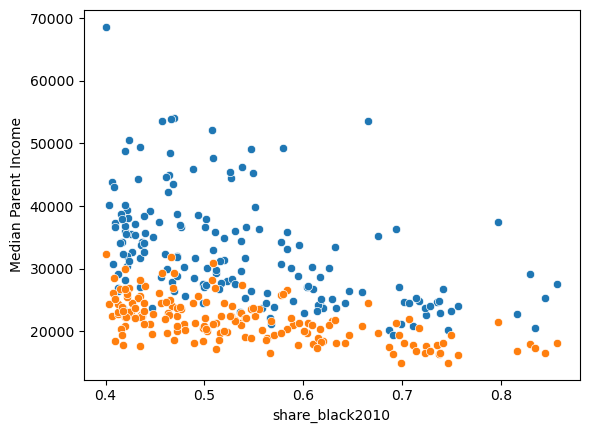

In [175]:
# Create a scatter plot


sns.scatterplot(x='share_black2010', y='Median Parent Income', data=filter_intergen_data)
sns.scatterplot(x='share_black2010', y='Median Child Income', data=filter_intergen_data)


<AxesSubplot:xlabel='share_black2010', ylabel='Interquartile Income Range'>

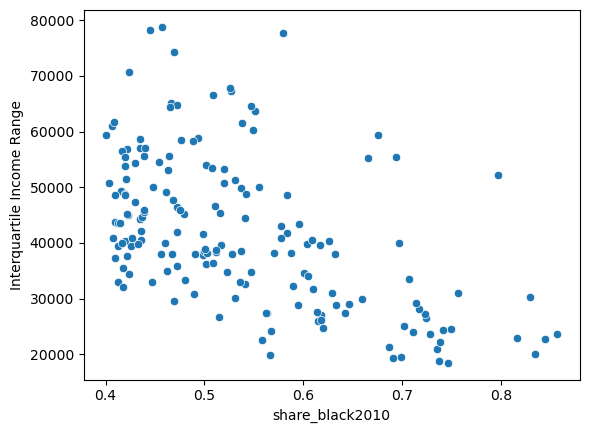

In [176]:
sns.scatterplot(x='share_black2010', y='Interquartile Income Range', data=filter_intergen_data)


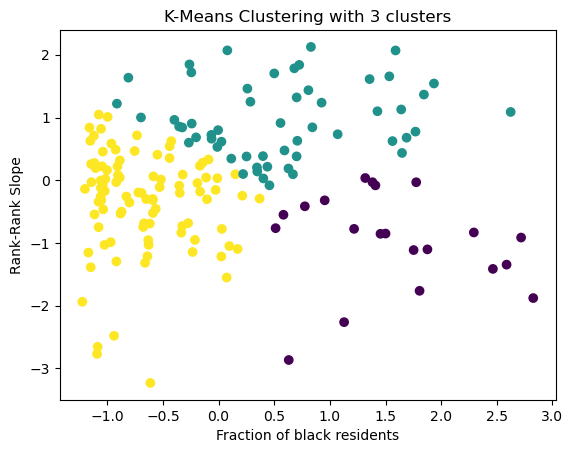

In [177]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



# Select the columns with the Rank-Rank Slope and any other relevant variables
X = filter_intergen_data[['share_black2010', 'Rank-Rank Slope']]

# Remove any rows with missing data or extreme values
X = X.dropna()
X = X[X['Rank-Rank Slope'] < 20]

# Normalize the data
X = (X - X.mean()) / X.std()

# Choose the number of clusters
k = 3

# Cluster the data
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
labels = kmeans.labels_

# Identify the outliers
outliers = X[labels == -1]

# Visualize the clusters
plt.scatter(X['share_black2010'], X['Rank-Rank Slope'], c=labels)
plt.xlabel('Fraction of black residents')
plt.ylabel('Rank-Rank Slope')
plt.title('K-Means Clustering with {} clusters'.format(k))
plt.show()


In [178]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Select the columns with the Rank-Rank Slope and any other relevant variables
X = filter_intergen_data[['share_black2010', 'Rank-Rank Slope']]

# Remove any rows with missing data or extreme values
X = X.dropna()
X = X[X['Rank-Rank Slope'] < 20]

# Normalize the data
X = (X - X.mean()) / X.std()

# Choose the number of clusters
k = 3

# Cluster the data
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
labels = kmeans.labels_

# Print the cluster labels for each row of the data
print(labels)


[2 0 1 2 2 2 0 0 1 2 0 0 2 2 1 0 2 2 0 1 1 1 2 2 2 2 2 2 1 2 1 2 2 2 1 2 0
 2 2 2 2 0 2 1 2 0 1 2 2 2 0 2 2 2 2 1 2 2 2 2 1 1 2 2 1 1 2 2 2 1 2 2 1 2
 1 2 1 2 2 0 2 1 1 2 1 2 2 2 2 1 2 0 1 1 1 2 0 1 1 2 0 1 1 2 2 1 2 2 2 1 2
 2 1 1 1 1 1 1 2 1 0 1 1 2 1 1 1 1 2 2 1 2 1 2 0 1 2 2 1 2 2 0 2 2 2 0 2 2
 2 0 2 2 1 2 1 2 1 2 1 2 1 2 2 2 2 2 0 2 2 2]


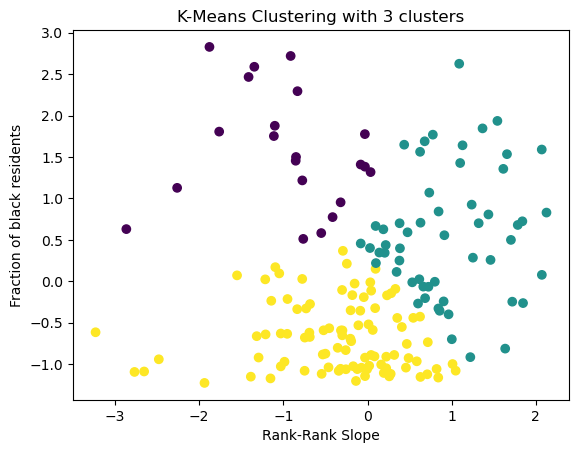

In [179]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select the columns with the Rank-Rank Slope and any other relevant variables
X = filter_intergen_data[['share_black2010', 'Rank-Rank Slope']]

# Remove any rows with missing data or extreme values
X = X.dropna()
X = X[X['Rank-Rank Slope'] < 20]

# Normalize the data
X = (X - X.mean()) / X.std()

# Choose the number of clusters
k = 3

# Cluster the data
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
labels = kmeans.labels_

# Identify the outliers
outliers = X[labels == -1]

# Visualize the clusters
plt.scatter(X['Rank-Rank Slope'], X['share_black2010'], c=labels)
plt.xlabel('Rank-Rank Slope')
plt.ylabel('Fraction of black residents')
plt.title('K-Means Clustering with {} clusters'.format(k))
plt.show()


In [180]:
X

share_black2010  Rank-Rank Slope
0          -0.592492        -0.316150
1           1.454803        -0.853796
2          -0.914973         1.220739
3          -0.919657        -1.294610
4          -0.873150        -0.500629
..               ...              ...
174        -0.882925        -0.532207
175         2.294115        -0.832528
176         0.028575        -0.776299
177        -0.234729        -1.143966
178        -0.920983        -0.030330

[170 rows x 2 columns]

In [181]:

rank_rank_slope

0     -0.316150
1     -0.853796
2      1.220739
3     -1.294610
4     -0.500629
         ...   
174   -0.532207
175   -0.832528
176   -0.776299
177   -1.143966
178   -0.030330
Name: Rank-Rank Slope, Length: 170, dtype: float64

In [182]:
filter_intergen_data.columns

Index(['County_FIPS_Code', 'state', 'county', 'cz', 'czname', 'hhinc_mean2000',
       'mean_commutetime2000', 'frac_coll_plus2000', 'frac_coll_plus2010',
       'foreign_share2010', 'med_hhinc1990', 'med_hhinc2016', 'poor_share2010',
       'poor_share2000', 'poor_share1990', 'share_white2010',
       'share_black2010', 'share_hisp2010', 'share_asian2010',
       'share_black2000', 'share_white2000', 'share_hisp2000',
       'share_asian2000', 'gsmn_math_g3_2013', 'rent_twobed2015',
       'singleparent_share2010', 'singleparent_share1990',
       'singleparent_share2000', 'traveltime15_2010', 'emp2000',
       'mail_return_rate2010', 'ln_wage_growth_hs_grad', 'popdensity2010',
       'popdensity2000', 'ann_avg_job_growth_2004_2013', 'job_density_2013',
       'Countyname', 'Commuting Zone ID', 'Commuting Zone Name ', 'State',
       'Number of Children in Core Sample', 'Rank-Rank Slope',
       'Absolute Upward Mobility', 'Top 1% Income Share',
       'Interquartile Income Range', 'G

In [183]:
filter_intergen_data["rank_rank_slope"] = filter_intergen_data["Rank-Rank Slope"]

In [184]:
import statsmodels.formula.api as smf

# Define the regression model
#rank_rank_slope = 'Rank-Rank Slope'
rank_rank_slope = X["Rank-Rank Slope"]

model = smf.ols('rank_rank_slope ~ singleparent_share1990 + singleparent_share2000 + singleparent_share2010', data=filter_intergen_data)

# Fit the model to the data
results = model.fit()

# Print the regression results summary
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:        rank_rank_slope   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.697
Date:                Wed, 12 Apr 2023   Prob (F-statistic):              0.170
Time:                        15:57:59   Log-Likelihood:                 234.37
No. Observations:                 170   AIC:                            -460.7
Df Residuals:                     166   BIC:                            -448.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

## Explore each data set

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

**Interactive plot** :

In [185]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


interactive(children=(Output(),), _dom_classes=('widget-interact',))

Explain what you see when moving elements of the interactive plot around. 

# Merge data sets

Now you create combinations of your loaded data sets. Remember the illustration of a (inner) **merge**:

Here we are dropping elements from both data set X and data set Y. A left join would keep all observations in data X intact and subset only from Y. 

Make sure that your resulting data sets have the correct number of rows and columns. That is, be clear about which observations are thrown away. 

**Note:** Don't make Venn diagrams in your own data project. It is just for exposition. 

# Analysis

To get a quick overview of the data, we show some **summary statistics** on a meaningful aggregation. 

MAKE FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.

In [ ]:
filter_intergen_data.to_csv('/Users/bjorngudmundsson/prufa.csv')